In [2]:
from IPython.display import Image

1943年，Warren McCulloch 和 Walter Pitts发表了首个简化脑细胞的概念，即McCulloch-Pitts（MCP）神经元。[A logical calculus of the ideas immanent in nervous activity](https://link.springer.com/article/10.1007/BF02478259)。如下图所示，生物神经元是大脑中相互关联的神经细胞，参与化学和电信号的处理和传输。

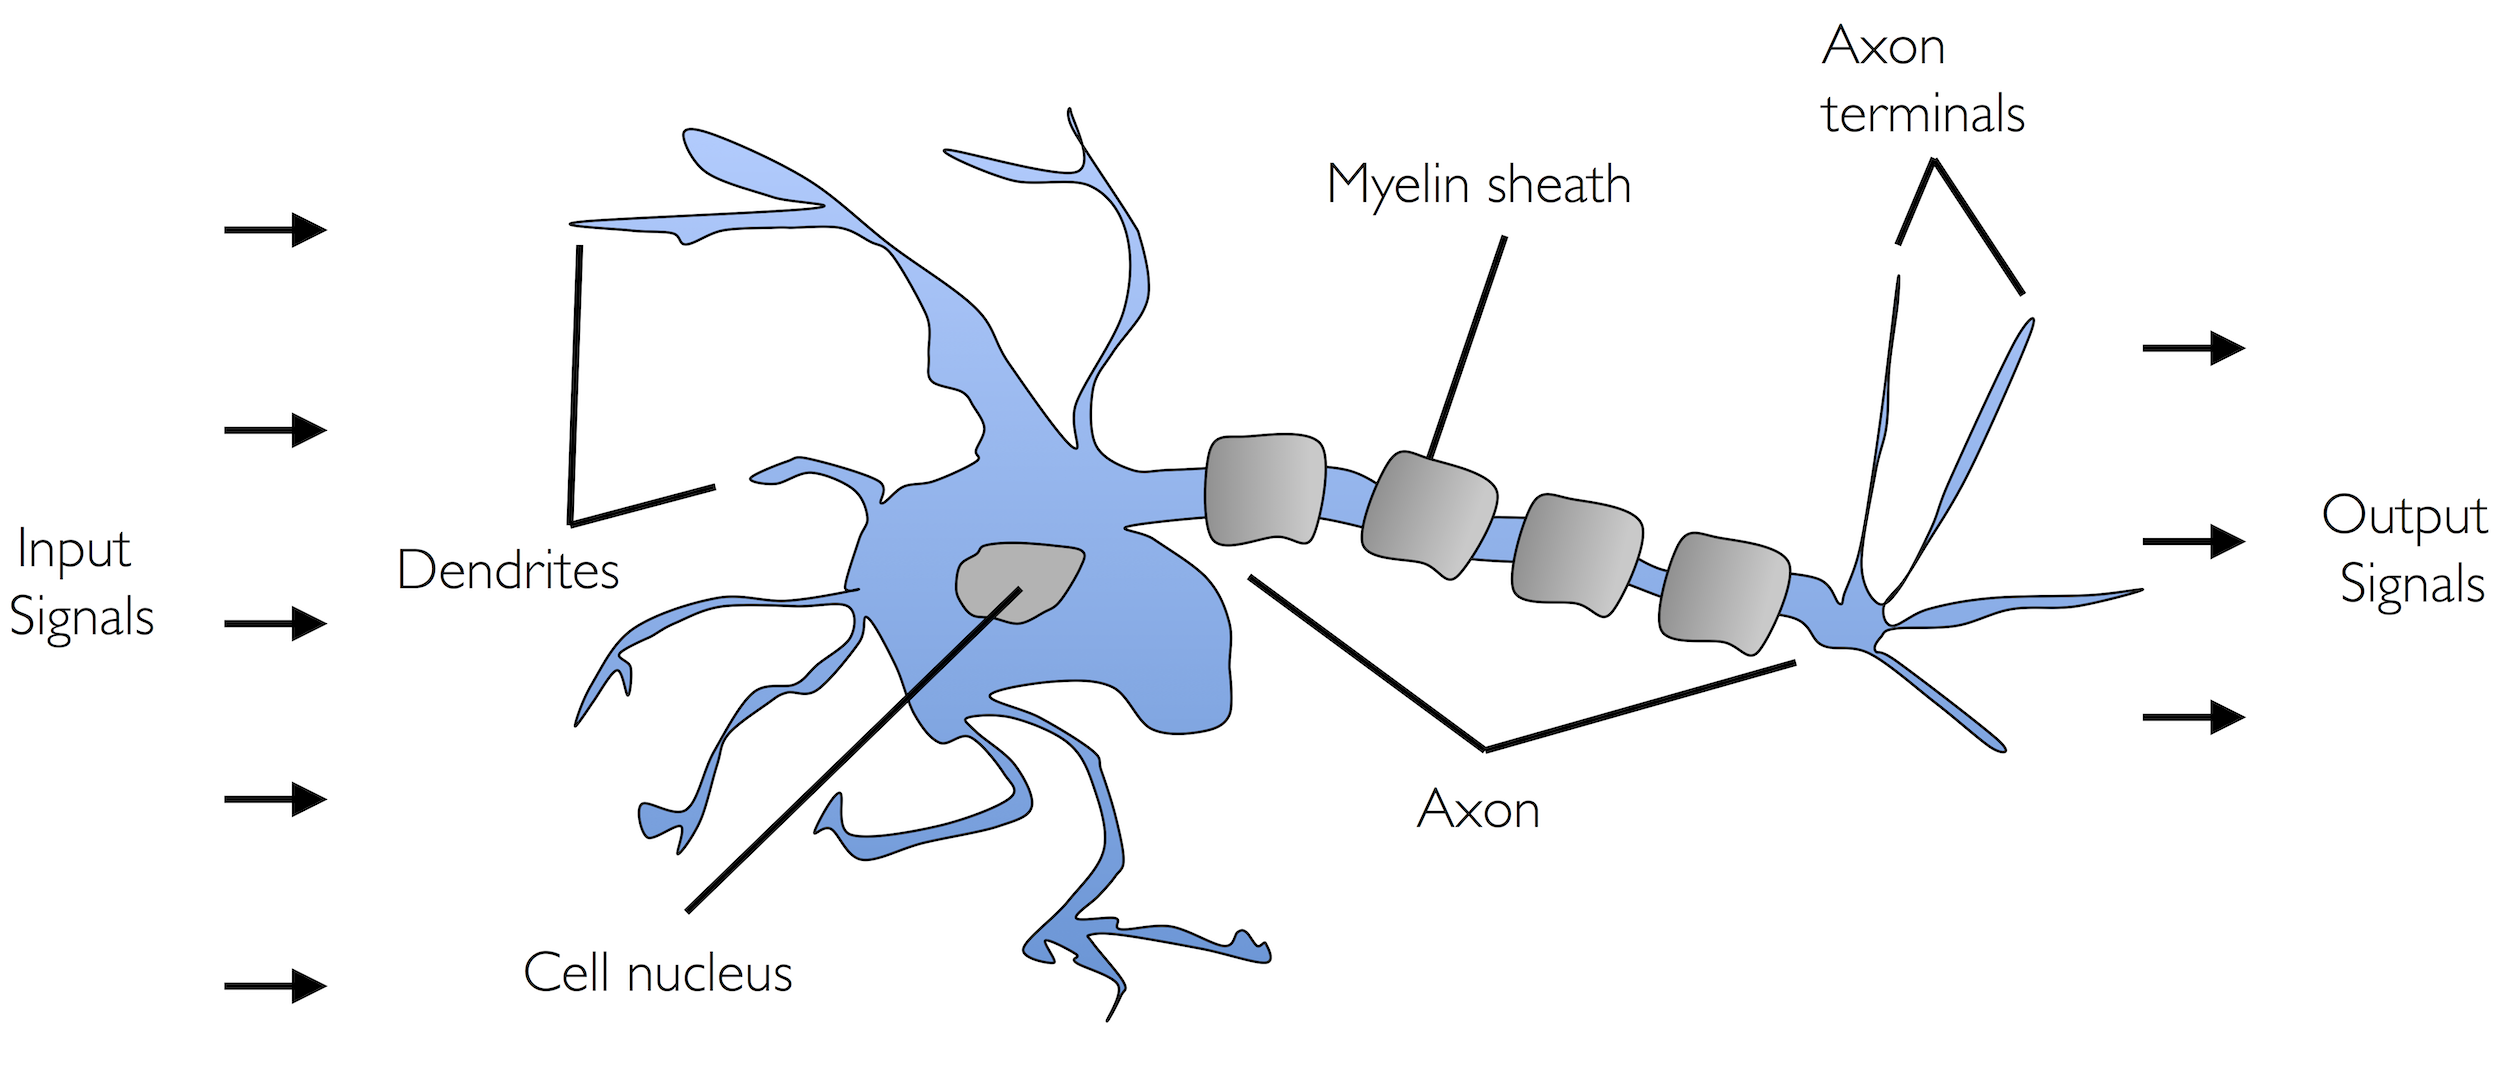

In [4]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter2/figures/02_01.png', 
      width=450)

Frank Rosenblatt基于MCP神经元模型首次发表了感知器学习法则的概念。[The Perceptron — A Perceiving and Recognizing Automaton](https://websites.umass.edu/brain-wars/1957-the-birth-of-cognitive-science/the-perceptron-a-perceiving-and-recognizing-automaton/).该算法可以自动学习最佳权重系数，然后将该系数与输入特征相乘，以决定神经元是否激活(transmits a signal)。在监督学习和分类任务的背景下，这种算法可用于预测新数据点属于某一类还是另一类。

#### 人工神经元的正式定义

更正式地来说，我们可以将人工神经元(artificial neurons)背后的思想放入到具有0和1两个类别的二分类任务中。然后，我们可以定义一个决策函数$\sigma(z)$,该函数是一些输入值$x$和相应权重向量$w$的线性组合。其中，$z$就是对应的净输入(net input),且满足$z=w_{1}x_{1}+w_{2}x_{2}+...+w_{m}x_{m}$:

$$w=\begin{bmatrix}w_1\\\vdots\\w_m\end{bmatrix},\quad x=\begin{bmatrix}x_1\\\vdots\\x_m\end{bmatrix}$$

这样一来，如果某个样本$x^{(i)}$的净输入大于预定义的某阈值$\theta$,则对应预测结果就为类别1；否则，预测结果就是类别0。在感知机算法(perceptron algorithm)中，决策函数$\sigma(\cdot)$是单位阶跃函数(unit step function)的变体：
$$\sigma(z)=\left\{\begin{matrix}1&\text{if}\quad z\geq\theta\\0&\text{otherwise}\end{matrix}\right.$$

为了简化后面的代码执行，我们可以通过几个步骤来修改这个设置。首先，我们将阈值$\theta$移到等式的左边：
$$\begin{array}{l}z\geq\theta\\z-\theta\geq0\end{array}$$

然后，我们定义一个偏置单元(bias unit)$b=-\theta$,并将其作为净输入的一部分：
$$z=w_1x_1+...+w_mx_m+b=w^Tx+b$$

最后，根据上述变换和约定，我们可以重新定义决策函数如下：
$$\sigma(z)=\left\{\begin{matrix}1&\text{if}\quad z\geq0\\0&\text{otherwise}\end{matrix}\right.$$

下图展示了净输入$z=w^Tx+b$是如何通过感知器的决策功能被压缩成二进制输出(0和1)，以及如何利用它来对可以通过线性决策边界分离的两个类别进行判别。

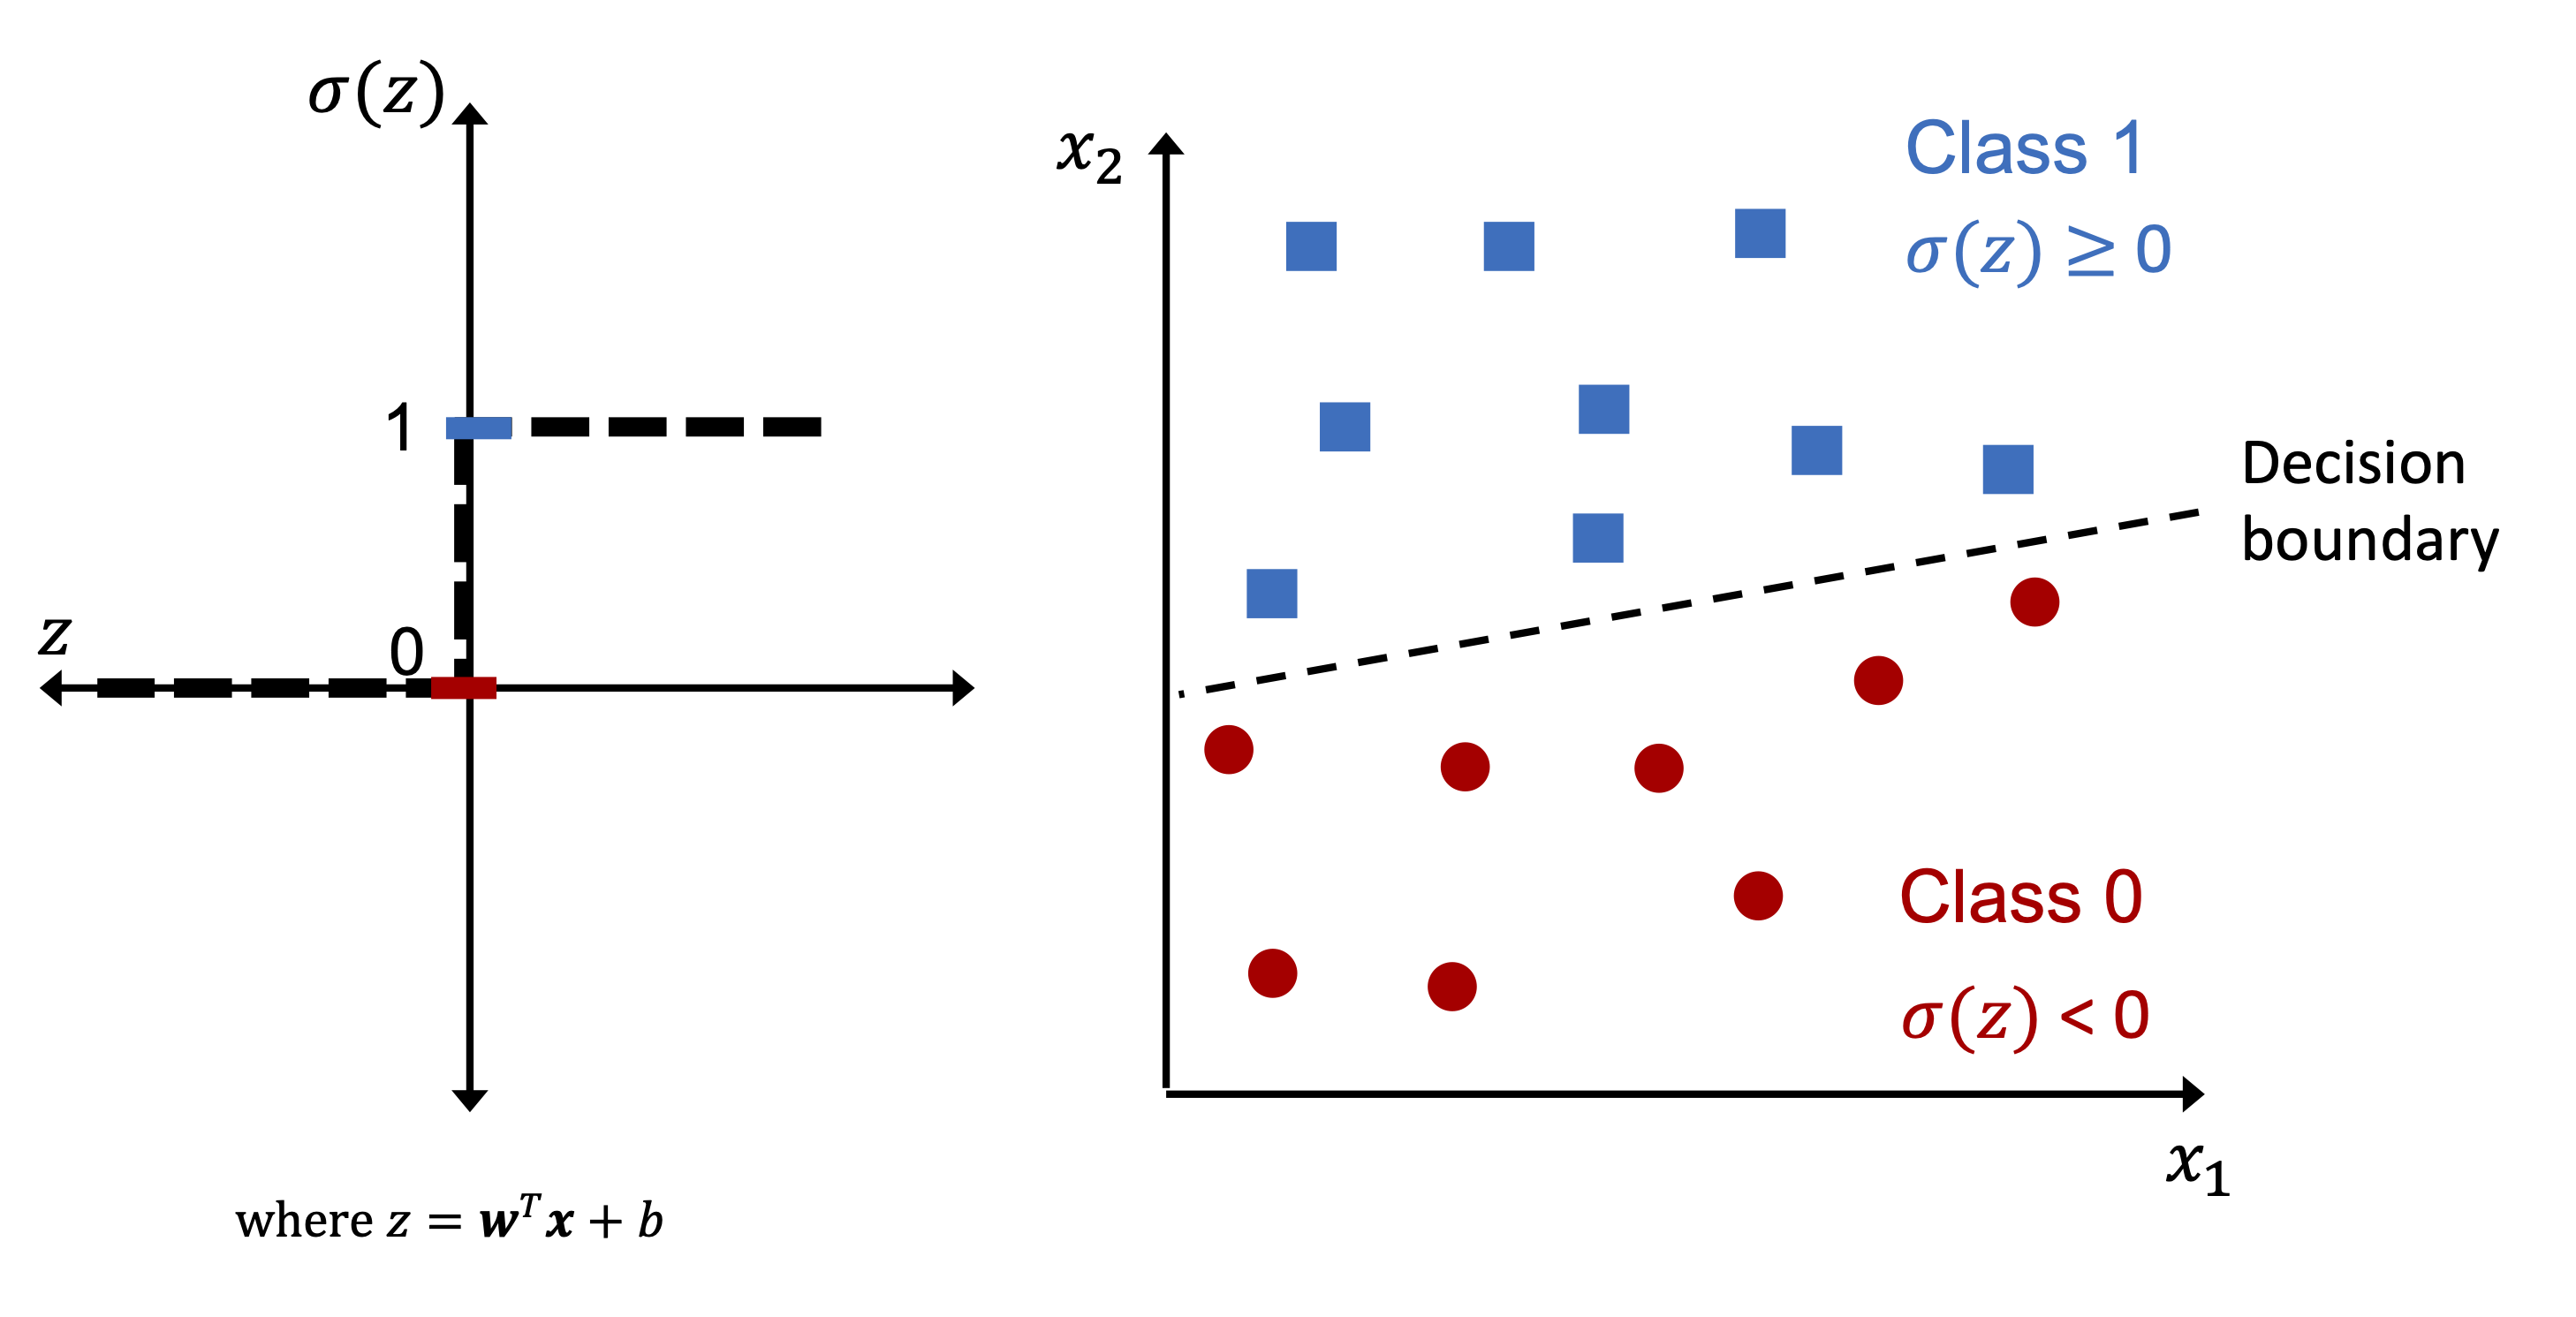

In [6]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter2/figures/02_02.png', 
      width=450)

#### 感知机学习法则

MCP神经元和Rosenblatt阈值感知器背后的整个想法是使用还原论方法(Reductionist approach)来模拟大脑中单个神经元的工作方式，即要么激活要么不激活。因此，感知器算法可以总结为如下步骤：

* 将权重和偏置单元初始化为0或较小的随机数；
* 对于每个训练样本$x^{(i)}$:
  * 计算输出值，即$\hat{y}^{(i)}$；
  * 更新权重和偏置单元；

这里，输出值是我们之前定义的单位阶跃函数预测的类标签，而偏置单元和权重向量$w$中每个权重$w_j$的同时更新过程可以更正式记为：
$$w_j:=w_j+\Delta w_j\\\mathrm{and}\quad b:= b+ \Delta b$$
其中，上式中的$\Delta$计算过程如下：
$$\Delta w_{j}=\eta\big(y^{(i)}-\hat{y}^{(i)}\big)x_{j}^{(i)}\\\mathrm{and}\quad\Delta b=\eta\big(y^{(i)}-\hat{y}^{(i)}\big)$$
具体地，对于二维数据集，上述更新过程为：
$$\begin{aligned}\Delta w_{1}&= \eta(y^{(i)}-\mathrm{output}^{(i)})x_{1}^{(i)};\\\Delta w_{2}&= \eta(y^{(i)}-\mathrm{output}^{(i)})x_{2}^{(i)};\\\Delta b&= \eta(y^{(i)}-\mathrm{output}^{(i)})\end{aligned}$$
其中，$\eta$为学习率。`需要注意的是，偏置单元和权重都是同时更新的，这意味着不需要重新计算预测值标签。`

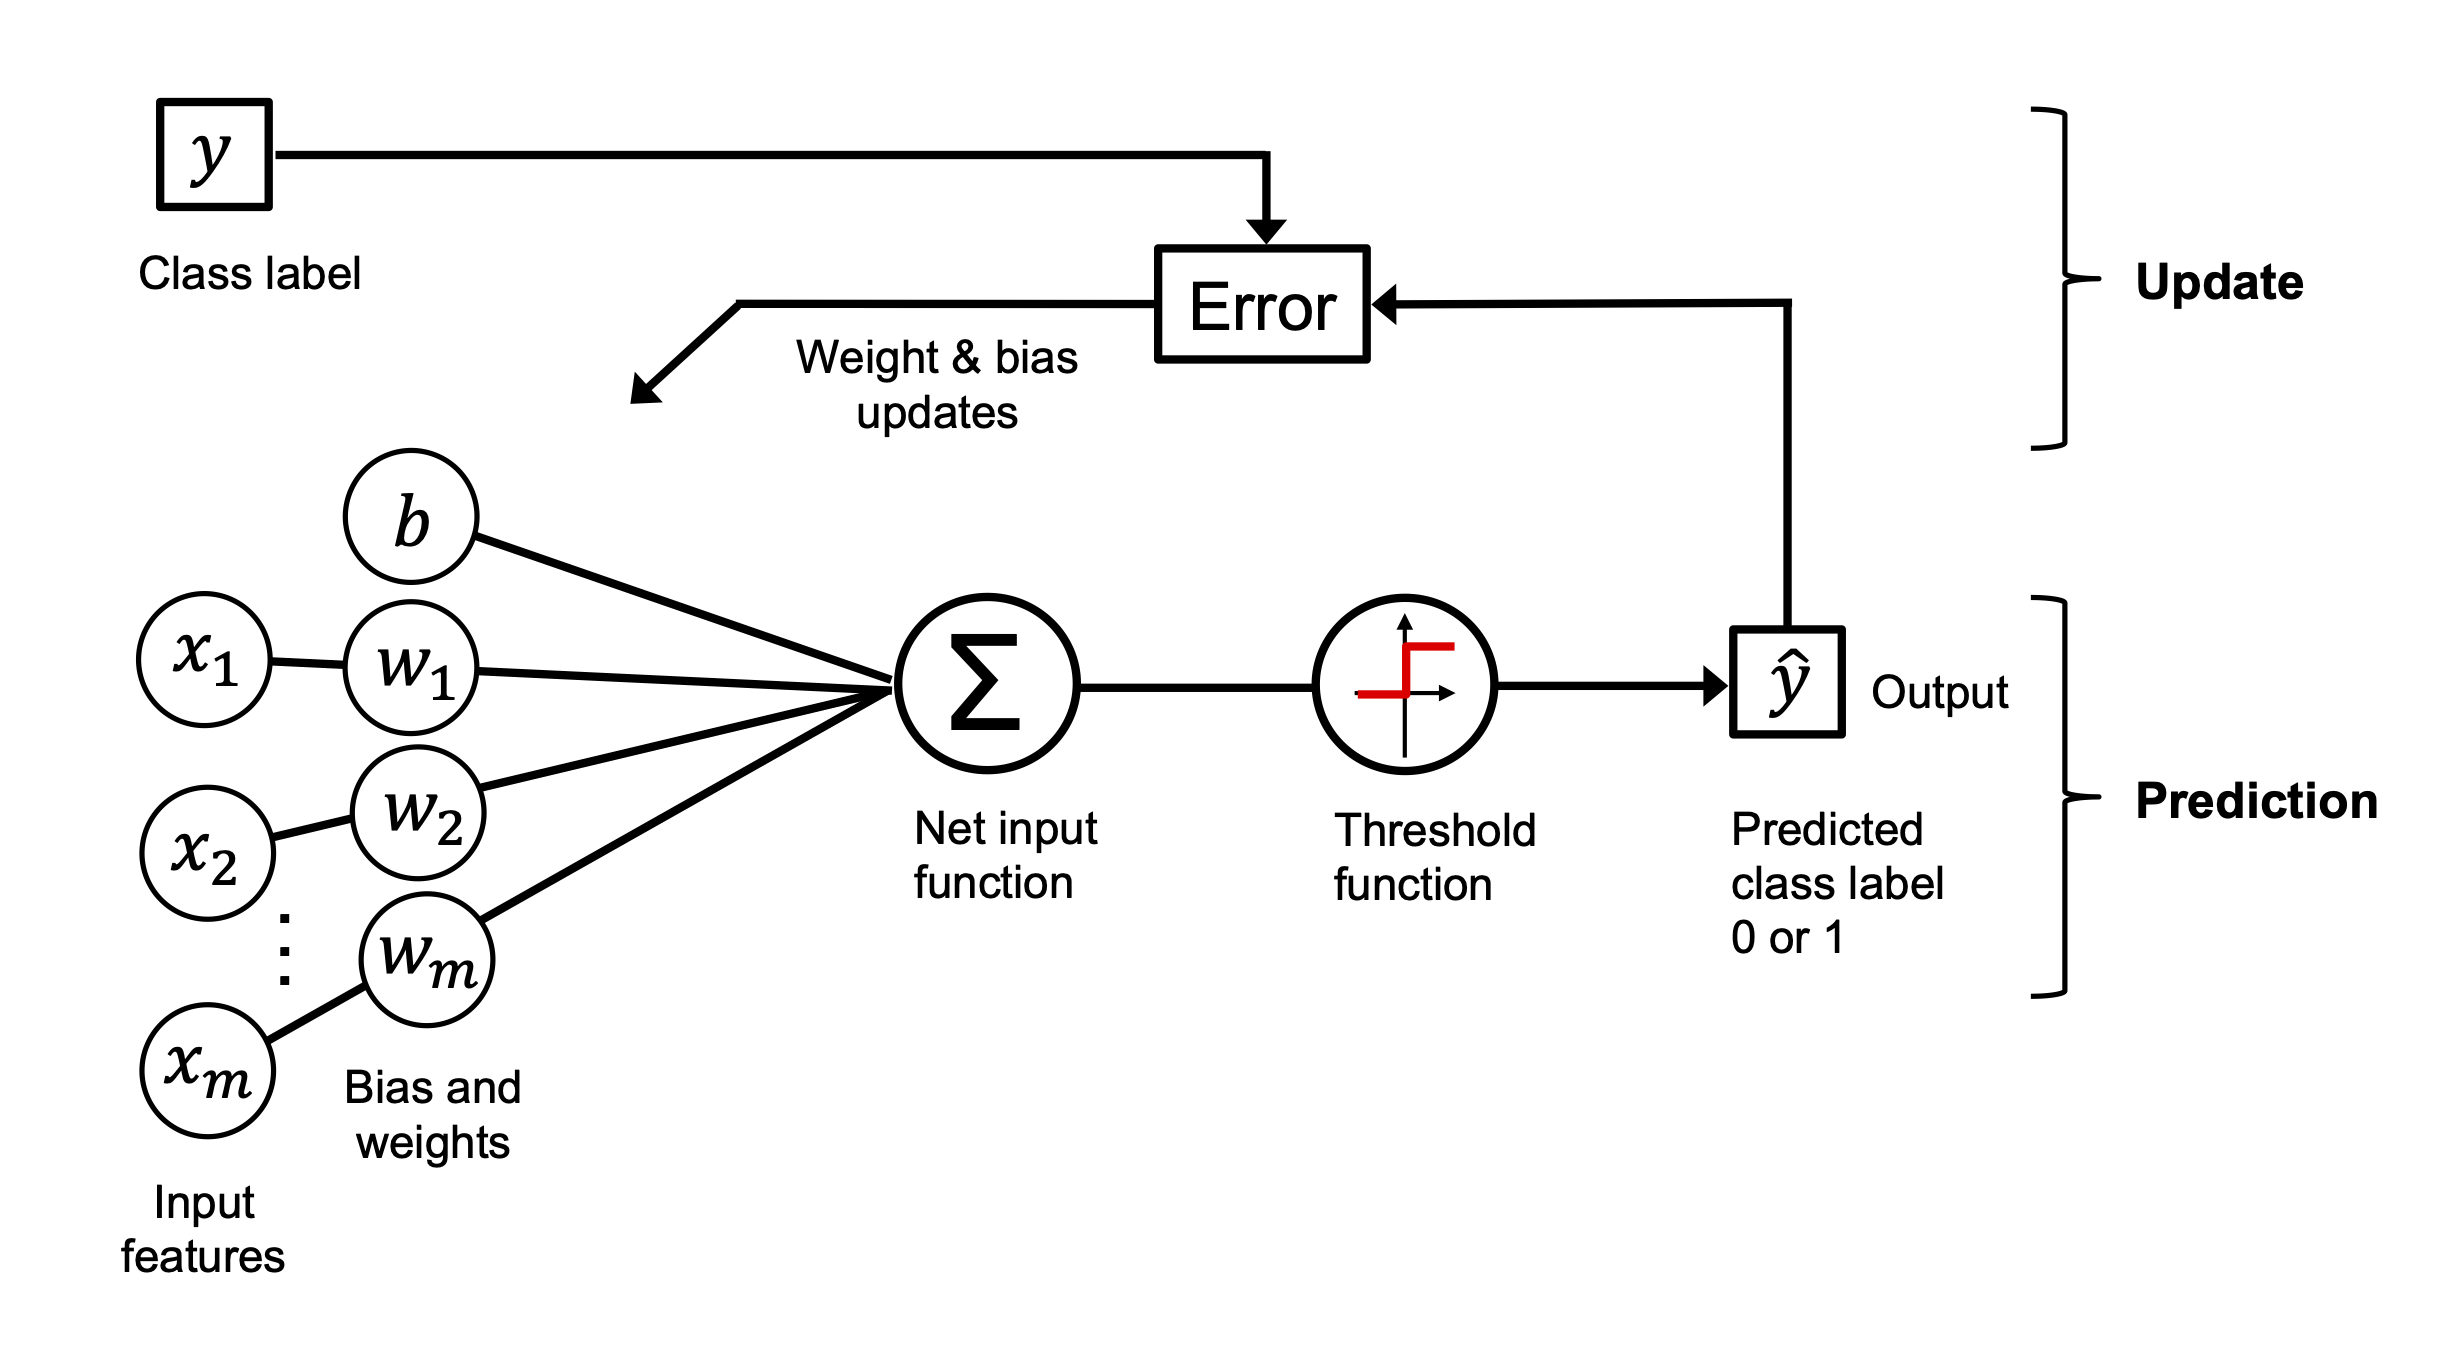

In [9]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter2/figures/02_04.png', 
      width=450)

#### 利用Python实现感知器学习算法